# Logistics Regression

## Importing the necessary libraries

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,cohen_kappa_score, classification_report
from sklearn.model_selection import validation_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
plt.style.use("seaborn")


## Importing the MNIST data using pandas

In [ ]:
train_file = pd.read_csv('mnist_train.csv')
test_file = pd.read_csv('mnist_test.csv')

X = []
y = []
for row in train_file.iterrows() :
    label = row[1][0] # label (the number visible in the image)
    image = list(row[1][1:]) # image information as list, without label
    image = np.array(image) / 255
    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(len(X))
print(len(y))

60000
60000


## Splitting the data into test and train for learning

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(len(X_train), len(y_train))
print(X_train[1].shape)

54000 54000
(784,)


## Applying the Logistic Regressor with lbfgs solver on the train data

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train,y_train)

c:\users\radhe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## Preditcing using our Classifier on the test set for validation

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print("Cohen Kappa score is " + str(cohen_kappa_score(y_test, predictions)))
print("Accuracy is " + str(metrics.accuracy_score(y_test, predictions)))
print(classification_report(y_test,predictions))

Cohen Kappa score is 0.9183056480251641
Accuracy is 0.9265
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       624
           1       0.95      0.97      0.96       654
           2       0.90      0.90      0.90       572
           3       0.90      0.90      0.90       589
           4       0.94      0.94      0.94       580
           5       0.89      0.89      0.89       551
           6       0.96      0.95      0.96       580
           7       0.95      0.94      0.94       633
           8       0.89      0.87      0.88       585
           9       0.92      0.92      0.92       632

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



## Printing the Confusion Matrix using matplotlib & seaborn

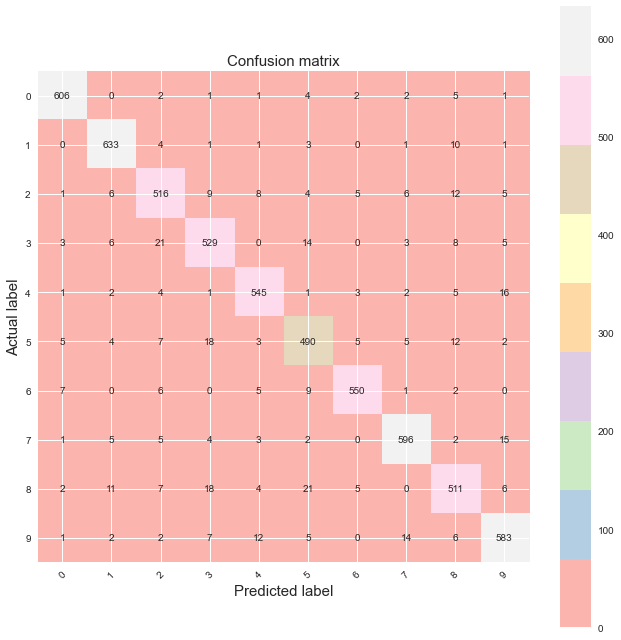

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.savefig('LR - Confusion Matrix')

